In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
path = "/Users/wendy/Documents/NFT data collection"
# change the working directory to the path where the data are located
os.chdir(path)
data_clean = pd.read_csv('data_clean.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wendy/Documents/NFT data collection'

In [5]:
data_clean

,Unnamed: 0,Unnamed: 0.1,auction_type,collection_slug_x,created_date_x,event_type,id,total_price,payment_tocken,token_usd_price,...,name,description,asset_name,schema_name,owner_address,creator_adress,traits,trait_type,trait_value,total_usd_price
0,0,0,NaN,beeple-everydays,2021-06-24 18:06:32.586448,successful,17219488,18.15,ETH,2123.84,...,INTO THE ETHER #48/207,Into the Ether - Open Edition:\r\nDAY #4917 of...,Beeple Round 2 Open Edition,ERC721,0x3be89b64e1437bb18da2d26bcbe9bd3daaadfc26,0xc6b0562605d35ee710138402b878ffe6f2e23807,[],[],[],38547.696
1,1,1,NaN,beeple-everydays,2021-03-16 21:27:32.800972,bid_withdrawn,17219488,70.00,WETH,2410.38,...,INTO THE ETHER #48/207,Into the Ether - Open Edition:\r\nDAY #4917 of...,Beeple Round 2 Open Edition,ERC721,0x3be89b64e1437bb18da2d26bcbe9bd3daaadfc26,0xc6b0562605d35ee710138402b878ffe6f2e23807,[],[],[],168726.600
2,2,2,NaN,beeple-everydays,2021-06-24 15:41:06.373570,cancelled,17219488,18.50,ETH,2327.16,...,INTO THE ETHER #48/207,Into the Ether - Open Edition:\r\nDAY #4917 of...,Beeple Round 2 Open Edition,ERC721,0x3be89b64e1437bb18da2d26bcbe9bd3daaadfc26,0xc6b0562605d35ee710138402b878ffe6f2e23807,[],[],[],43052.460
3,3,3,NaN,beeple-everydays,2021-06-24 15:41:06.411054,cancelled,17219488,23.75,ETH,2327.16,...,INTO THE ETHER #48/207,Into the Ether - Open Edition:\r\nDAY #4917 of...,Beeple Round 2 Open Edition,ERC721,0x3be89b64e1437bb18da2d26bcbe9bd3daaadfc26,0xc6b0562605d35ee710138402b878ffe6f2e23807,[],[],[],55270.050
4,4,4,NaN,beeple-everydays,2021-05-20 03:45:36.767955,cancelled,17219488,16.50,ETH,2327.16,...,INTO THE ETHER #48/207,Into the Ether - Open Edition:\r\nDAY #4917 of...,Beeple Round 2 Open Edition,ERC721,0x3be89b64e1437bb18da2d26bcbe9bd3daaadfc26,0xc6b0562605d35ee710138402b878ffe6f2e23807,[],[],[],38398.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297626,297626,297626,NaN,superrare,2021-04-02 01:42:49.360482,transfer,21049184,0.00,NaN,0.00,...,BLerKCHAIN MAMA,this is an important piece. turn up duh volume,SuperRare,ERC721,0x5fae9d4b591f213b3ba75287f2cfac0883d17f7a,0x5fae9d4b591f213b3ba75287f2cfac0883d17f7a,"[{'trait_type': 'tag', 'value': 'animation', '...","['tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'ye...","['animation', 'gan', 'vaporwave', 'audioreacti...",0.000
297627,297627,297627,NaN,superrare,2021-04-02 01:35:23.673199,transfer,21048361,0.00,NaN,0.00,...,Hope,3D illustration.\nCollaboration between\nSalom...,SuperRare,ERC721,0x62247532f72dce05d7bca9f1a6d778c91a00054c,0x46bb3570c680ae05ae806c82278aa6d47944f9bb,"[{'trait_type': 'year_created', 'value': '2020...","['year_created', 'tag', 'tag', 'tag', 'tag', '...","['2020', 'scifi', 'cgi', '3d', 'illustration',...",0.000
297628,297628,297628,NaN,superrare,2021-04-02 01:29:34.355721,transfer,21048361,0.00,NaN,0.00,...,Hope,3D illustration.\nCollaboration between\nSalom...,SuperRare,ERC721,0x62247532f72dce05d7bca9f1a6d778c91a00054c,0x46bb3570c680ae05ae806c82278aa6d47944f9bb,"[{'trait_type': 'year_created', 'value': '2020...","['year_created', 'tag', 'tag', 'tag', 'tag', '...","['2020', 'scifi', 'cgi', '3d', 'illustration',...",0.000
297629,297629,297629,NaN,superrare,2021-04-02 01:25:13.534362,transfer,19934185,0.00,NaN,0.00,...,Maiden at rest,"The mechanical maiden rests, her form incomple...",SuperRare,ERC721,0xd33126c05a372feab036612f6d4934e9d85cb205,0x47732130965ffcd674515dc2442236003eab7637,"[{'trait_type': 'artist', 'value': 'Dick Gillm...","['artist', 'tag', 'tag', 'tag', 'tag', 'year_c...","['Dick Gillman', 'machine', 'bronze', 'mechani...",0.000


In [4]:
#cryptopunksdata.to_csv('cryptopunksdata.csv')

In [81]:
data_clean.columns

Index(['Unnamed: 0', 'auction_type', 'collection_slug_x', 'created_date_x',
       'event_type', 'id', 'total_price', 'payment_tocken', 'token_usd_price',
       'to_account', 'transaction_time', 'seller_address', 'seller_account',
       'winner_address', 'winner_account', 'image_url', 'image_preview_url',
       'contract_address', 'image_thumbnail_url', 'image_original_url',
       'external_link', 'asset_contract_type', 'num_sales', 'name',
       'description', 'asset_name', 'schema_name', 'owner_address',
       'creator_adress', 'traits', 'trait_type', 'trait_value',
       'total_usd_price'],
      dtype='object')

In [108]:
data_clean['auction_type'].fillna('english', inplace = True)

In [109]:
from datetime import datetime
data_clean['auction_type'] = data_clean['auction_type'].astype('str')
data_clean['collection_slug_x'] = data_clean['collection_slug_x'].astype('str')
data_clean['event_type'] = data_clean['event_type'].astype('str')
data_clean['id'] = data_clean['id'].astype('str')
data_clean['payment_tocken'] = data_clean['payment_tocken'].astype('str')
data_clean['asset_contract_type'] = data_clean['asset_contract_type'].astype('str')
data_clean['name'] = data_clean['name'].astype('str')
data_clean['description'] = data_clean['description'].astype('str')
data_clean['asset_name'] = data_clean['asset_name'].astype('str')
data_clean['num_sales'] = data_clean['num_sales'].astype('int')
data_clean['total_usd_price'] = data_clean['total_usd_price'].astype('float')
data_clean['transaction_time'] = pd.to_datetime(data_clean['transaction_time'])
data_clean['created_date_x'] = pd.to_datetime(data_clean['created_date_x'])

In [110]:
sales = data_clean[data_clean['event_type']=='successful']

In [111]:
# counting number of each category
data_clean.groupby(['collection_slug_x','auction_type'])['Unnamed: 0'].count().reset_index()

,collection_slug_x,auction_type,Unnamed: 0
0,art-blocks,dutch,78
1,art-blocks,english,31747
2,autoglyphs,dutch,58
3,autoglyphs,english,5302
4,beeple-everydays,dutch,11
5,beeple-everydays,english,4676
6,boredapeyachtclub,dutch,30
7,boredapeyachtclub,english,54728
8,cryptopunks,english,40800
9,hashmasks,dutch,86


In [112]:
df = data_clean.groupby(['collection_slug_x','event_type'])['Unnamed: 0'].count().reset_index()

In [113]:
df

,collection_slug_x,event_type,Unnamed: 0
0,art-blocks,bid_entered,1195
1,art-blocks,bid_withdrawn,1951
2,art-blocks,cancelled,9590
3,art-blocks,successful,9679
4,art-blocks,transfer,9410
5,autoglyphs,bid_entered,814
6,autoglyphs,bid_withdrawn,195
7,autoglyphs,successful,359
8,autoglyphs,transfer,3992
9,beeple-everydays,bid_entered,108


In [115]:
# contract_addresses are platforms
data_clean.groupby(['collection_slug_x','contract_address']).count()

Unnamed: 0  \
collection_slug_x   contract_address                                         
art-blocks          0x059edd72cd353df5106d2b9cc5ab83a52287ac3a         974   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b       22337   
                    0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270        8436   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          78   
autoglyphs          0x131aebbfe55bca0c9eaad4ea24d386c5c082dd58          57   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b        1310   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06           1   
                    0xd4e4078ca3495de5b1d4db434bebc5a986197782        3992   
beeple-everydays    0x63c0691d05f441f42915ca6ca0a6f60d8ce148cd           8   
                    0x6e5dc5405baefb8c0166bcc78d2692777f2cbffb         200   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b         942   
                    0xc170384371494b2a8f6ba20f4d085c4dde763d96         592   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          11   
                    0xd92e44ac213b9ebda0178e1523cc0ce177b7fa96        2934   
boredapeyachtclub   0x7be8076f4ea4a4ad08075c2508e481d6c946d12b       34328   
                    0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d       20400   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          30   
cryptopunks         0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb       40800   
hashmasks           0x7be8076f4ea4a4ad08075c2508e481d6c946d12b       30617   
                    0xc2c747e0f7004f9e8817db2ca4997657a7746928       10200   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          86   
makersplace         0x0ba51d9c015a7544e3560081ceb16ffe222dd64f        1477   
                    0x131aebbfe55bca0c9eaad4ea24d386c5c082dd58          10   
                    0x1f0678d1238921dc99309360668b16a17098aa2a        3023   
                    0x2a46f2ffd99e19a89476e2f62270e0a35bbf0756       20280   
                    0x2d9e5de7d36f3830c010a28b29b3bdf5ca73198e         128   
                    0x7a6425c9b3f5521bfa5d71df710a2fb80508319b           1   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b        7386   
                    0x7e3abde9d9e80fa2d1a02c89e0eae91b233cde35       14292   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          53   
rarible             0x60f80121c31a0d46b5279700f9df786054aa5ee5        3077   
                    0x6a5ff3ceecae9ceb96e6ac6c76b82af8b39f0eb3           3   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b        9561   
                    0x93f2a75d771628856f37f256da95e99ea28aafbe           1   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06        8686   
                    0xd07dc4262bcdbf85190c01c996b4c06a461d2430        6760   
superrare           0x131aebbfe55bca0c9eaad4ea24d386c5c082dd58         119   
                    0x2947f98c42597966a0ec25e92843c09ac17fbaa7        7805   
                    0x41a322b28d0ff354040e2cbc676f0320d8c8850d        1527   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b        1729   
                    0x8c9f364bf7a56ed058fc63ef81c6cf09c833e656         935   
                    0xa5af48b105ddf2fa73cbaac61d420ea31b3c2a07          11   
                    0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0        9795   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          49   
                    0xf2ee97405593bc7b6275682b0331169a48fedec7           1   
wrapped-cryptopunks 0x131aebbfe55bca0c9eaad4ea24d386c5c082dd58        1356   
                    0x7be8076f4ea4a4ad08075c2508e481d6c946d12b         735   
                    0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb           4   
                    0xb7f7f6c52f2e2fdb1963eab30438024864c313f6       20396   
                    0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06          96   

       

In [ ]:
#0x7be8076f4ea4a4ad08075c2508e481d6c946d12b Opensea
#0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06 Etherscan Dapp Page
#0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb Larva Lab
#0x131aebbfe55bca0c9eaad4ea24d386c5c082dd58 Etherscan Dapp Page
#0x059edd72cd353df5106d2b9cc5ab83a52287ac3a artblocks ExchangeV1
#0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270 artblocks
.

In [42]:
sales.groupby(['collection_slug_x'])['total_usd_price'].describe()

,count,mean,std,min,25%,50%,75%,max
collection_slug_x,,,,,,,,
art-blocks,9644.0,2232.850897,4527.573050,0.212384,528.836160,1019.44320,2102.6016,127563.600
autoglyphs,358.0,37588.697083,61586.277468,425.212000,3929.104000,6902.48000,31592.1200,329195.200
beeple-everydays,65.0,96277.443498,91152.344655,4672.448000,21217.161600,82916.34000,148668.8000,424555.616
boredapeyachtclub,10174.0,4648.790558,6702.531085,2.126060,1380.496000,3185.76000,5946.7520,231740.540
cryptopunks,9951.0,39796.199259,141453.704223,2.149330,6308.283550,31810.08400,51476.4535,9027186.000
hashmasks,10035.0,5148.664589,12682.145339,96.719850,2142.960000,3396.59160,4771.5126,644799.000
makersplace,10182.0,2295.012641,16391.136337,2.149330,322.399500,752.26550,1848.4238,1051022.370
rarible,9620.0,572.761139,1396.479067,0.000000,14.175067,58.03191,343.8928,73077.220
superrare,10191.0,6719.771941,30086.668470,0.859732,859.732000,2149.33000,5373.3250,2149330.000


<AxesSubplot:title={'center':'total_usd_price'}, xlabel='[collection_slug_x]'>

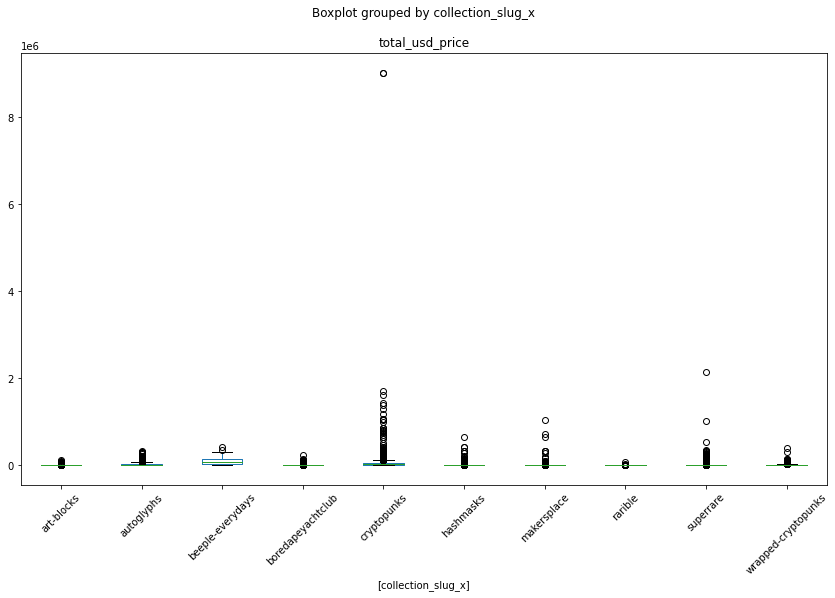

In [9]:
sales.boxplot(column=['total_usd_price'],by=['collection_slug_x'],grid=False,rot = 45, figsize = (14,8))

In [62]:
sales.groupby(['seller_address'])['Unnamed: 0'].count().sort_values(ascending = False).head(30)

seller_address
0xc77dce01a98ebc40f76b2d1f403e52d55b74fded    2058
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459    1486
0x83e725d29b5a573db65f8b896d1be6c71f14b0be     939
0xc2be9e536eee410a720c6440cbac293f4358451c     669
0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a     428
0x2218e854019d3ac7989333470e8cf7bda8b930f3     301
0x3c6137504c38215fea30605b3e364a23c1d3e14f     295
0x721931508df2764fd4f70c53da646cb8aed16ace     294
0x10017ca37b1257ac0771e24652aa28c758e378eb     275
0x304518f5e4bb048220938075b2fed988e2957c1d     263
0xee402489d83e2b22d496910f8c810d35a3ad7b25     261
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647     249
0xebd4d9c4ebc66cfbac7aad613948c26ae3ef0772     219
0x99d46eb671bfb7f367ebf9d5fc76b99587277de5     214
0x92f1ff14a80ea8c23028a40c74c05bb994ea0ee2     196
0xa3cb30128532f43fe1c8a9f4c19422aa631307a9     178
0xca8fe4acb1cb8b5550a3c71ffe2399f6c7016686     176
0x63a9dbce75413036b2b778e670aabd4493aaf9f3     175
0xf983557ec70fbf1a4b1e247af7bf10247e9b69c4     164
0x6f4a2d3a4f47f9

In [63]:
sales.groupby(['winner_address'])['Unnamed: 0'].count().sort_values(ascending = False).head(30)

winner_address
0x0000000000000000000000000000000000000000    1734
0xf52393e120f918ffba50410b90a29b1f8250c879     534
0x3612b2e93b49f6c797066ca8c38b7f522b32c7cb     431
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459     429
0x15e37293bcd44422b60c227568cd58403dec3e5e     396
0x694e64d4ad77e0c234b7b1c55ac40302ad86ce3f     375
0x208b82b04449cd51803fae4b1561450ba13d9510     362
0x3c6137504c38215fea30605b3e364a23c1d3e14f     344
0xe703f231ab056ecb99c92a1232cc1020acfc72f8     324
0xc72aed14386158960d0e93fecb83642e68482e4b     318
0x57115f7d04c16f3983802b7c5a2d5089a188d76a     224
0xebd4d9c4ebc66cfbac7aad613948c26ae3ef0772     223
0x99d46eb671bfb7f367ebf9d5fc76b99587277de5     195
0x207b3c1083a62e282d375a11f52730879cbfbbbb     194
0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4     189
0xb53349160e38739b37e4bbfcf950ed26e26fcb41     189
0x34dfd60a1fe24cf57479c85971c7e031241762a9     181
0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac     179
0x1ad60130a2528c6f73a8c6e50758532949627dfd     174
0x7d21dac0342215

In [64]:
sales.groupby(['seller_address'])['total_usd_price'].sum().sort_values(ascending = False).head(30)

seller_address
0x6611fe71c233e4e7510b2795c242c9a57790b376    1.653213e+07
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459    1.629584e+07
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647    1.496086e+07
0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e    1.074665e+07
0x6f4a2d3a4f47f9c647d86c929755593911ee91ec    7.806685e+06
0xca8fe4acb1cb8b5550a3c71ffe2399f6c7016686    6.978767e+06
0xa3cb30128532f43fe1c8a9f4c19422aa631307a9    6.482616e+06
0x78f0269f5b1ca914c8c58993f41181f89e212b27    6.347663e+06
0x0b88fd87884080bd6d93d341fcca0eea76b03e75    6.234265e+06
0xee3766e4f996dc0e0f8c929954eaafef3441de87    4.996371e+06
0xc352b534e8b987e036a93539fd6897f53488e56a    4.526919e+06
0x62bdc64a14405e797f86796ea3c2476209ee0bf9    4.034072e+06
0xe83c750b2708320bb134796c555b80df39a3d97b    3.641542e+06
0xc24f574d6853f6f6a31c19d468a8c1b3f31c0e54    3.553487e+06
0x13816f65ba8195768e6825eb774fd3c6a05a0ac8    3.324636e+06
0xabf107de3e01c7c257e64e0a18d60a733aad395d    3.117673e+06
0x45c51324bc2a27ce428e6820b7905b0fd437431

In [65]:
sales.groupby(['winner_address'])['total_usd_price'].sum().sort_values(ascending = False).head(30)

winner_address
0x0000000000000000000000000000000000000000    8.359916e+07
0xf4b4a58974524e183c275f3c6ea895bc2368e738    1.086142e+07
0xf476cd75be8fdd197ae0b466a2ec2ae44da41897    5.979286e+06
0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7    5.296194e+06
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459    5.239487e+06
0x51787a2c56d710c68140bdadefd3a98bff96feb4    4.909670e+06
0x208b82b04449cd51803fae4b1561450ba13d9510    3.818860e+06
0xbec69dfce4c1fa8b7843fee1ca85788d84a86b06    3.781936e+06
0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac    3.538919e+06
0xc0548825bd34b96448b487ed7028cf6b532228f9    3.141224e+06
0x696ed7b26f4b019ceec78dc8b9140ad64a6f354b    3.095448e+06
0xab61cc776cc19af7e99d3ba4539435311fa74e8a    3.027285e+06
0x78f0269f5b1ca914c8c58993f41181f89e212b27    2.934451e+06
0xabf107de3e01c7c257e64e0a18d60a733aad395d    2.650598e+06
0x3612b2e93b49f6c797066ca8c38b7f522b32c7cb    2.448895e+06
0xb1adceddb2941033a090dd166a462fe1c2029484    2.279355e+06
0x84c920595cde2841a719fe5aa8be5166d8e7c6d

In [66]:
sales.groupby(['contract_address'])['total_usd_price'].sum().sort_values(ascending = False).head(30)

contract_address
0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb    3.960120e+08
0x7be8076f4ea4a4ad08075c2508e481d6c946d12b    1.402646e+08
0x2947f98c42597966a0ec25e92843c09ac17fbaa7    4.244040e+07
0x7e3abde9d9e80fa2d1a02c89e0eae91b233cde35    2.263126e+07
0x41a322b28d0ff354040e2cbc676f0320d8c8850d    1.495707e+07
0x131aebbfe55bca0c9eaad4ea24d386c5c082dd58    1.340750e+07
0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06    1.197354e+07
0x8c9f364bf7a56ed058fc63ef81c6cf09c833e656    1.039800e+07
0x0ba51d9c015a7544e3560081ceb16ffe222dd64f    9.400439e+04
0xa5af48b105ddf2fa73cbaac61d420ea31b3c2a07    1.490195e+04
0xf2ee97405593bc7b6275682b0331169a48fedec7    7.092789e+01
0x93f2a75d771628856f37f256da95e99ea28aafbe    0.000000e+00
Name: total_usd_price, dtype: float64

In [116]:
monthly_transactions = sales.groupby(pd.Grouper(key='transaction_time',freq='M'))['Unnamed: 0'].count().reset_index(['transaction_time'])
monthly_transactions

,transaction_time,Unnamed: 0
0,2019-03-31,49
1,2019-04-30,106
2,2019-05-31,194
3,2019-06-30,163
4,2019-07-31,57
5,2019-08-31,58
6,2019-09-30,152
7,2019-10-31,35
8,2019-11-30,82
9,2019-12-31,102


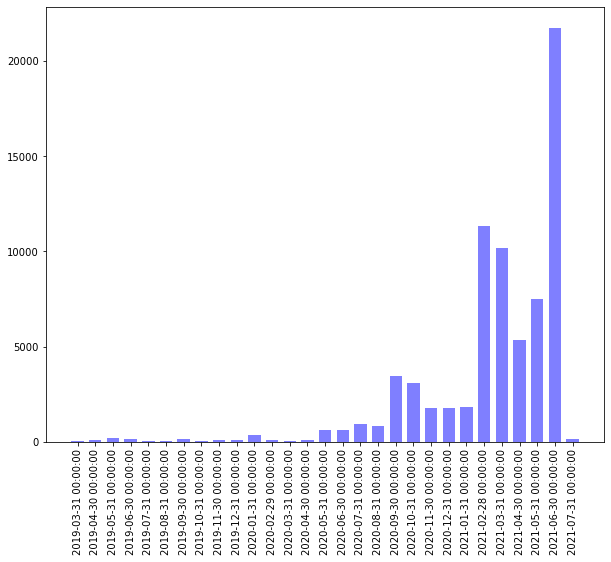

In [117]:
x = np.arange(29)  # the label locations
width = 0.7

month = monthly_transactions['transaction_time']
plt.figure(1, figsize=(10,8))
rects1 = plt.bar(x, monthly_transactions['Unnamed: 0'], width, align ='center',color='blue', alpha=0.5 )
#plt.twinx(ax=None)
#rects2 = plt.bar(monthly_transactions['transaction_time'], monthly_avgprice['total_price'],  width, color='green', alpha=0.5 )
plt.xticks(x, month, rotation=90)
plt.savefig('bbb.png',dpi =1000 ,transparent=True)

In [16]:
monthly_avgprice = events.groupby(pd.Grouper(key='transaction_time',freq='M'))['total_price'].mean().reset_index(['transaction_time'])
monthly_avgprice

,transaction_time,total_price
0,2019-03-31,0.781225
1,2019-04-30,1.563701
2,2019-05-31,0.705230
3,2019-06-30,1.338546
4,2019-07-31,0.432950
5,2019-08-31,0.641143
6,2019-09-30,0.528808
7,2019-10-31,0.609714
8,2019-11-30,0.560940
9,2019-12-31,0.805813


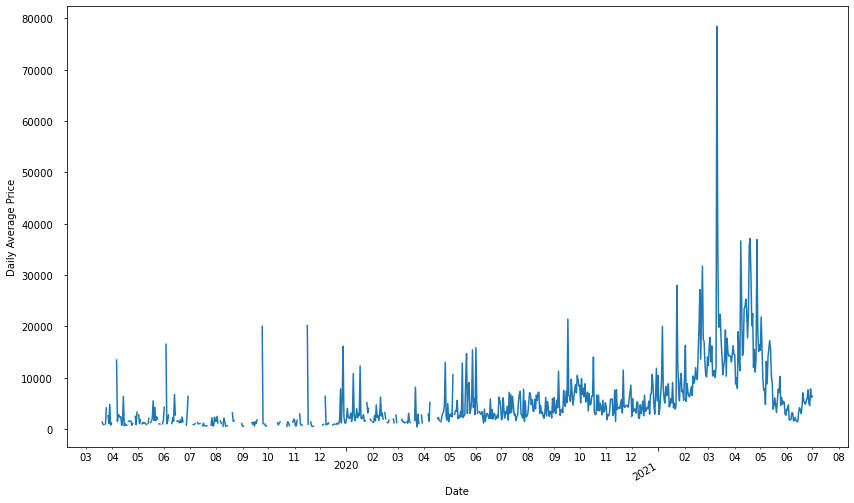

In [18]:
import matplotlib.dates as mdates
year = mdates.YearLocator()
month = mdates.MonthLocator()

fig, ax = plt.subplots(figsize = (14,9))
mafmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(mafmt)

mifmt = mdates.DateFormatter("%m")
ax.xaxis.set_minor_locator(month)
ax.xaxis.set_minor_formatter(mifmt)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Daily Average Price')
ax.tick_params(pad=10)
ax.plot(daily_average_price.transaction_time, daily_average_price.total_usd_price)
plt.savefig('Daily_average_price.png',transparent=True)


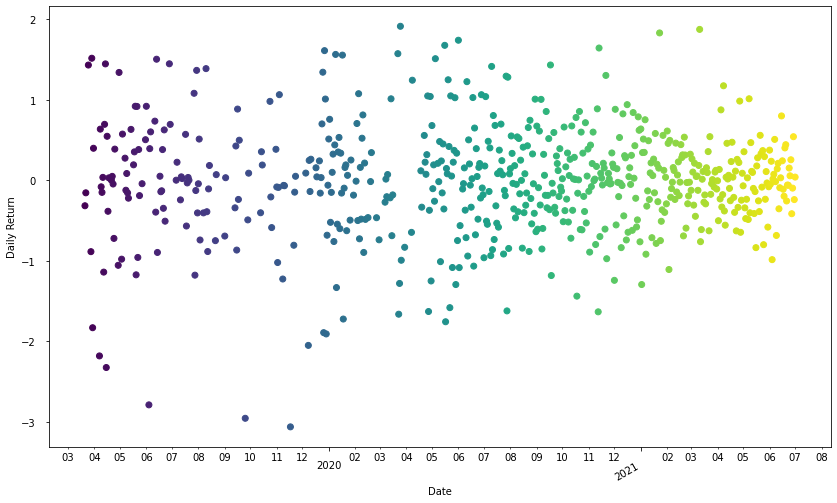

In [19]:
daily_return = np.diff(np.log(daily_average_price.total_usd_price))
transaction_time = daily_average_price.drop(0).transaction_time
year = mdates.YearLocator()
month = mdates.MonthLocator()

fig, ax = plt.subplots(figsize = (14,9))
mafmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(mafmt)

mifmt = mdates.DateFormatter("%m")
ax.xaxis.set_minor_locator(month)
ax.xaxis.set_minor_formatter(mifmt)

fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Daily Return')
ax.tick_params(pad=10)
ax.scatter(transaction_time, daily_return, c = np.arange(transaction_time.shape[0]))
#plt.savefig('Daily_return.png',transparent=True)



In [20]:
import umap
#Window width (Number of columns)
w = 5
#Stride
s = 1
#Start time
t_0 = 0
#Desired rows
r = np.shape(daily_return)[0]-w
#Length of matrix
len = w * r

Z = np.empty((r,w))
for i in range(r):
  starttime = t_0 + i * s
  endtime = starttime + w
  Z[i,:] = np.ravel(daily_return[starttime:endtime])


In [21]:
data_sine = pd.DataFrame(data = Z)
data_sine = data_sine.fillna(0)
reducer = umap.UMAP(random_state=11)
embedding = reducer.fit_transform(data_sine)

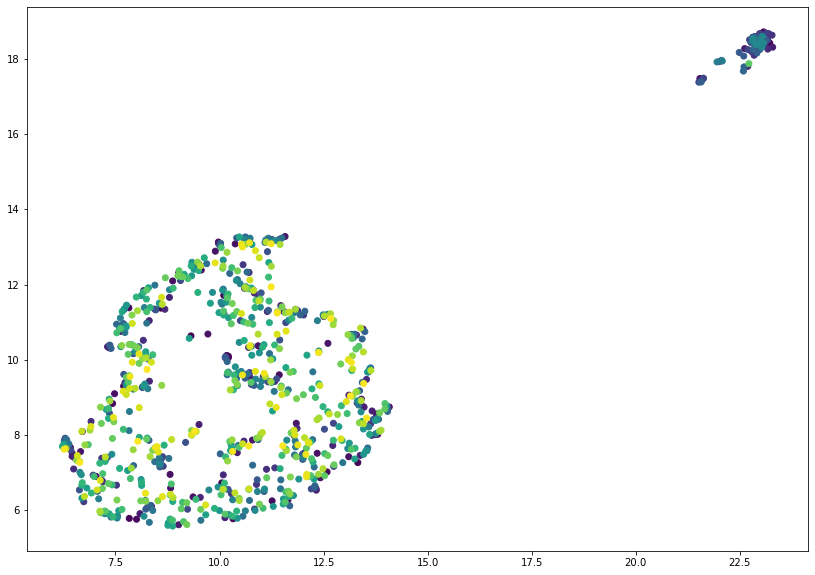

In [22]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(14,10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = np.arange(embedding.shape[0]))
#plt.savefig('UMAP_return.png',transparent=True)

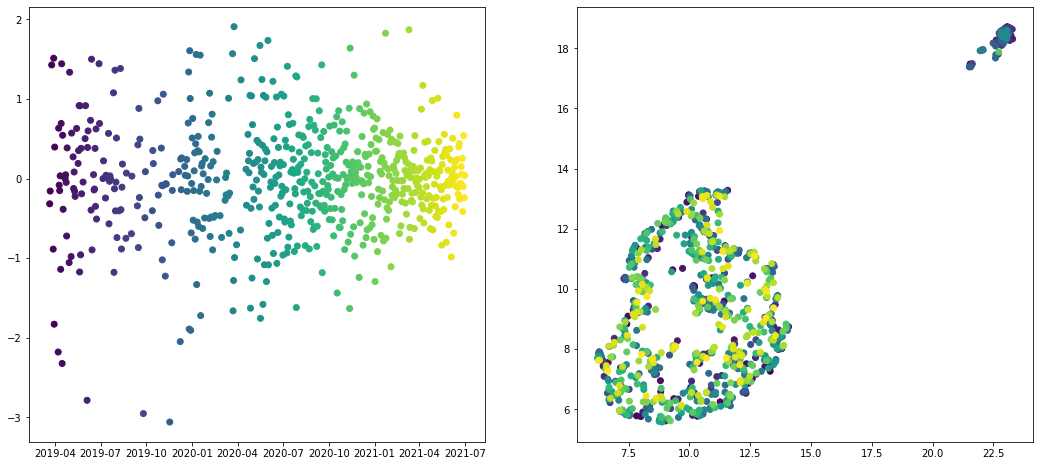

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18,8))
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,9))
ax1.scatter(transaction_time, daily_return, c = np.arange(transaction_time.shape[0]))
ax2.scatter(embedding[:, 0], embedding[:, 1], c = np.arange(embedding.shape[0]))
plt.savefig('Daily_return&UMAP.png',transparent=True)